In [200]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [201]:
# MPC import
import numpy as np
from LinearMPC.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [ ]:
Ts = 0.05
sim_time = ...
H = ...
x0 = ...  # initial state

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, T_ol=t_ol[..., :-1], X_ol=x_ol, U_ol=u_ol);

### MPC_Control_VelX 1 step OL

Maximum invariant set successfully computed after 1 iterations.


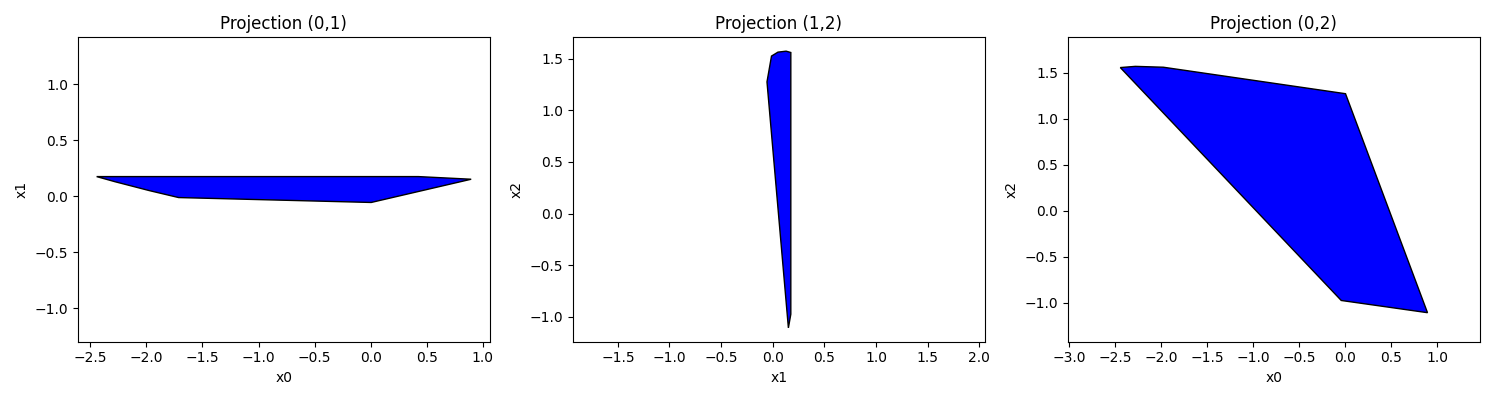

u0 =  [0.26]


In [228]:
from LinearMPC.MPCControl_xvel import MPCControl_xvel
import cvxpy as cp
Ts = 0.05
sim_time = 30
H = 7
# Use a state closer to equilibrium (with small velocities)
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0])   # initial state

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
xs, us = rocket.trim()

A, B = rocket.linearize(xs, us)

mpc_x = MPCControl_xvel(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
u0, x_traj, u_traj = mpc_x.get_u(x0)

print("u0 = ",u0)
#print("x_traj = ",x_traj)
#print("u_traj = ",u_traj)

### MPC_Control_VelY 1 step OL

In [225]:
from LinearMPC.MPCControl_yvel import MPCControl_yvel
import cvxpy as cp
Ts = 0.05
sim_time = 30
H = 1
# Use a state closer to equilibrium (with small velocities)
x0 = np.array([0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0, 0, 0])   # initial state

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
xs, us = rocket.trim()

A, B = rocket.linearize(xs, us)

mpc_y = MPCControl_yvel(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
u0, x_traj, u_traj = mpc_y.get_u(x0)

print("u0 = ",u0)
#print("x_traj = ",x_traj)
#print("u_traj = ",u_traj)

u0 =  [-0.02679847]


### MPC_Control_VelZ 1 step OL

In [233]:
from LinearMPC.MPCControl_zvel import MPCControl_zvel
import cvxpy as cp
Ts = 0.05
sim_time = 30
H = 1
# Use a state closer to equilibrium (with small velocities)
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0])   # initial state

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
xs, us = rocket.trim()

A, B = rocket.linearize(xs, us)

mpc_z = MPCControl_zvel(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
u0, x_traj, u_traj = mpc_z.get_u(x0)

print("u0 = ",u0)
#print("x_traj = ",x_traj)
#print("u_traj = ",u_traj)

# Debug: check solver status


u0 =  [40.]


### MPC_Control_ROLL 1 step OL

In [227]:
from LinearMPC.MPCControl_roll import MPCControl_roll
import cvxpy as cp
Ts = 0.05
sim_time = 30
H = 1
# Use a state closer to equilibrium (with small velocities)
x0 = np.array([0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0, 0, 0])   # initial state

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
xs, us = rocket.trim()
print(xs,us)

A, B = rocket.linearize(xs, us)

mpc_roll = MPCControl_roll(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
u0, x_traj, u_traj = mpc_roll.get_u(x0)

print("u0 = ",u0)
#print("x_traj = ",x_traj)
#print("u_traj = ",u_traj)

# Debug: check solver status


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [ 0.          0.         66.66666667  0.        ]
u0 =  [6.51936466e-28]


### Open-Loop trajectory

Maximum invariant set successfully computed after 1 iterations.


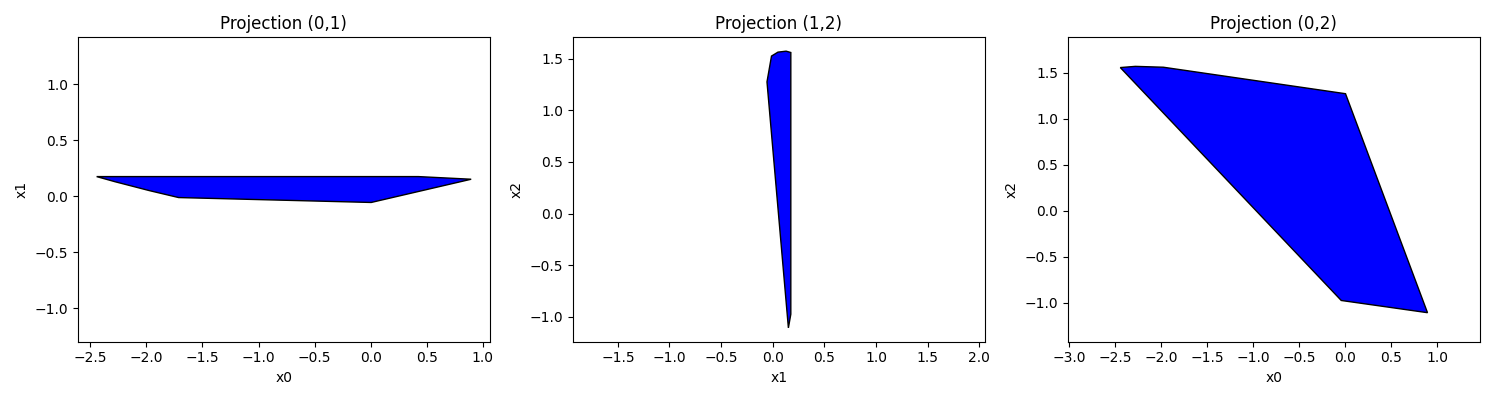

In [230]:
Ts = 0.05
t0 = 0
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0]) 
rocket = Rocket(Ts,model_params_filepath=rocket_params_path)
H = 5 # MPC horizon in seconds
mpc_ol = MPCVelControl().new_controller(rocket, Ts, H)
u, x_ol, u_ol, t_ol = mpc_ol.get_u(t0, x0)

In [231]:
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_ol[:-1], x_ol[:,:-1], u_ol);


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=99, step=2), IntSlider(value=0,…

### Close-loop trajectory

In [202]:
# all velocity to 5 m/s
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0]) 

In [ ]:
# roll to 30°
x0 = np.array([0, 0, 0, 0, 0, 0.52, 0, 0, 0, 0, 0, 0]) 

In [203]:

H = 5 # MPC horizon in seconds
Ts = 0.05
t0 = 0
rocket = Rocket(Ts=Ts,model_params_filepath=rocket_params_path)
mpc_cl = MPCVelControl().new_controller(rocket, Ts, H)
u, x_ol, u_ol, t_ol = mpc_cl.get_u(t0, x0)

Q diag: [  5. 200.  50.] R: [[1.]]
status optimal
u0 [0.26] du0 [0.26]
vx_traj [5.00000000e+00 5.12400025e+00 5.22713399e+00 5.04881944e+00
 4.83995895e+00 4.73713407e+00 4.66884425e+00 4.56601937e+00
 4.49772955e+00 4.39490467e+00 4.32661485e+00 4.22378997e+00
 4.15550015e+00 4.05267527e+00 3.98438545e+00 3.88156057e+00
 3.81327075e+00 3.71044587e+00 3.64215605e+00 3.53933117e+00
 3.47104135e+00 3.36821647e+00 3.29992665e+00 3.19710177e+00
 3.12881195e+00 3.02598707e+00 2.95769725e+00 2.85487237e+00
 2.78658254e+00 2.68375767e+00 2.61546784e+00 2.51264297e+00
 2.44435314e+00 2.34152827e+00 2.27323844e+00 2.17041357e+00
 2.10212374e+00 1.99929887e+00 1.93100904e+00 1.82818417e+00
 1.75989434e+00 1.65706947e+00 1.58877964e+00 1.48595477e+00
 1.41766494e+00 1.31484007e+00 1.24655024e+00 1.14372538e+00
 1.07543554e+00 9.72610677e-01 9.04320837e-01 8.01495978e-01
 7.33206137e-01 6.30381263e-01 5.24525441e-01 4.30854068e-01
 3.52407346e-01 2.87207823e-01 2.33329272e-01 1.89024597e-01
 1.527

In [204]:
sim_time = 3 # Simulation length
#x1 = rocket.simulate_step(x0, Ts, u, method='nonlinear')
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(mpc_cl, sim_time, H, x0, method='linear')

status optimal
u0 [0.26] du0 [0.26]
vx_traj [5.00000000e+00 5.12400025e+00 5.22713399e+00 5.04881944e+00
 4.83995895e+00 4.73713407e+00 4.66884425e+00 4.56601937e+00
 4.49772955e+00 4.39490467e+00 4.32661485e+00 4.22378997e+00
 4.15550015e+00 4.05267527e+00 3.98438545e+00 3.88156057e+00
 3.81327075e+00 3.71044587e+00 3.64215605e+00 3.53933117e+00
 3.47104135e+00 3.36821647e+00 3.29992665e+00 3.19710177e+00
 3.12881195e+00 3.02598707e+00 2.95769725e+00 2.85487237e+00
 2.78658254e+00 2.68375767e+00 2.61546784e+00 2.51264297e+00
 2.44435314e+00 2.34152827e+00 2.27323844e+00 2.17041357e+00
 2.10212374e+00 1.99929887e+00 1.93100904e+00 1.82818417e+00
 1.75989434e+00 1.65706947e+00 1.58877964e+00 1.48595477e+00
 1.41766494e+00 1.31484007e+00 1.24655024e+00 1.14372538e+00
 1.07543554e+00 9.72610677e-01 9.04320837e-01 8.01495978e-01
 7.33206137e-01 6.30381263e-01 5.24525441e-01 4.30854068e-01
 3.52407346e-01 2.87207823e-01 2.33329272e-01 1.89024597e-01
 1.52747650e-01 1.23154388e-01 9.90925307

In [205]:
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol);


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=59, step=2), IntSlider(value=0,…